<a href="https://colab.research.google.com/github/mfebus/test-repo/blob/master/Chronic_Disease_Indicators_Sample_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

# **Importing libraries and overview of the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel("/content/drive/MyDrive/SIADS 593: Milestone I/Datasets/U.S._Chronic_Disease_Indicators_SampleData.xlsx")

# **Loading Data**

In [4]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question - Metrics,DataValueUnit,DataValueType,DataValue - X Axis,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2022,2022,RI,Rhode Island,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among ad...,%,Crude Prevalence,6.8,...,7.8,Overall,Overall,POINT (-71.52247031399963 41.70828019300046),44,COPD,COPD01,CRDPREV,OVERALL,OVR
1,2022,2022,UT,Utah,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Crude Prevalence,31.1,...,32.4,Overall,Overall,POINT (-111.58713063499971 39.360700171000474),49,NPAW,NPW14,CRDPREV,OVERALL,OVR
2,2022,2022,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among ad...,%,Crude Prevalence,6.9,...,7.8,Overall,Overall,POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD01,CRDPREV,OVERALL,OVR
3,2022,2022,WY,Wyoming,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Crude Prevalence,34.2,...,36.2,Overall,Overall,POINT (-108.10983035299967 43.23554134300048),56,NPAW,NPW14,CRDPREV,OVERALL,OVR
4,2022,2022,AZ,Arizona,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,9.7,...,10.7,Overall,Overall,POINT (-111.76381127699972 34.865970280000454),4,AST,AST02,CRDPREV,OVERALL,OVR


# **Checking the info of the data**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YearStart                  250 non-null    int64  
 1   YearEnd                    250 non-null    int64  
 2   LocationAbbr               250 non-null    object 
 3   LocationDesc               250 non-null    object 
 4   DataSource                 250 non-null    object 
 5   Topic                      250 non-null    object 
 6   Question - Metrics         250 non-null    object 
 7   DataValueUnit              250 non-null    object 
 8   DataValueType              250 non-null    object 
 9   DataValue - X Axis         250 non-null    float64
 10  DataValueAlt               250 non-null    float64
 11  LowConfidenceLimit         250 non-null    float64
 12  HighConfidenceLimit        250 non-null    float64
 13  StratificationCategory1    250 non-null    object 

**Observations:**

* There are 250 observations/rows and 22 columns.
* All columns have 250 non-null values, i.e., there are no missing values.
* Data types: object (15), float64 (4) and int64(3).



# **Summary Statistics**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearStart,250.0,2022.0000,0.000000,2022.0,2022.000,2022.00,2022.000,2022.0
YearEnd,250.0,2022.0000,0.000000,2022.0,2022.000,2022.00,2022.000,2022.0
DataValue - X Axis,250.0,18.2704,11.034244,3.5,9.525,12.15,28.625,41.0
DataValueAlt,250.0,18.2704,11.034244,3.5,9.525,12.15,28.625,41.0
LowConfidenceLimit,250.0,17.1440,10.714093,3.1,8.525,11.20,27.375,39.3
HighConfidenceLimit,250.0,19.4660,11.340336,4.1,10.525,13.40,30.075,42.8
LocationID,250.0,29.3200,15.654964,1.0,17.000,29.50,42.000,56.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
LocationAbbr,250,50,RI,5
LocationDesc,250,50,Rhode Island,5
DataSource,250,1,BRFSS,250
Topic,250,5,Chronic Obstructive Pulmonary Disease,50
Question - Metrics,250,5,Chronic obstructive pulmonary disease among ad...,50
DataValueUnit,250,1,%,250
DataValueType,250,1,Crude Prevalence,250
StratificationCategory1,250,1,Overall,250
Stratification1,250,1,Overall,250
Geolocation,250,50,POINT (-71.52247031399963 41.70828019300046),5


⭐**Notes:**
  * Human-readable feature names (E.g., 'DataValue' to '% Prevalence')
  * Removal of ID columns that are not needed for analysis

In [9]:
df = df.rename(columns={
    "DataValue - X Axis": "Prevalence",
    "LocationDesc": "State",
    "Question - Metrics": "Metrics"
})

In [10]:
df.head()

,YearStart,YearEnd,LocationAbbr,State,DataSource,Topic,Metrics,DataValueUnit,DataValueType,Prevalence,...,HighConfidenceLimit,StratificationCategory1,Stratification1,Geolocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2022,2022,RI,Rhode Island,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among ad...,%,Crude Prevalence,6.8,...,7.8,Overall,Overall,POINT (-71.52247031399963 41.70828019300046),44,COPD,COPD01,CRDPREV,OVERALL,OVR
1,2022,2022,UT,Utah,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Crude Prevalence,31.1,...,32.4,Overall,Overall,POINT (-111.58713063499971 39.360700171000474),49,NPAW,NPW14,CRDPREV,OVERALL,OVR
2,2022,2022,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among ad...,%,Crude Prevalence,6.9,...,7.8,Overall,Overall,POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD01,CRDPREV,OVERALL,OVR
3,2022,2022,WY,Wyoming,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults,%,Crude Prevalence,34.2,...,36.2,Overall,Overall,POINT (-108.10983035299967 43.23554134300048),56,NPAW,NPW14,CRDPREV,OVERALL,OVR
4,2022,2022,AZ,Arizona,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,9.7,...,10.7,Overall,Overall,POINT (-111.76381127699972 34.865970280000454),4,AST,AST02,CRDPREV,OVERALL,OVR


##**Heatmap**

###Finding correlations between chronic disease prevalence rates across all US. States





In [48]:
# Create a pivot table showing states as rows and chronic disease prevalence rates as columns

pivot = df.pivot_table(
    index = "State",
    columns = "Metrics",
    values= "Prevalence",
    aggfunc= "mean"
)
# Compute pairwise Pearson correlations between chronic disease prevalence rates across states

corr = pivot.corr()


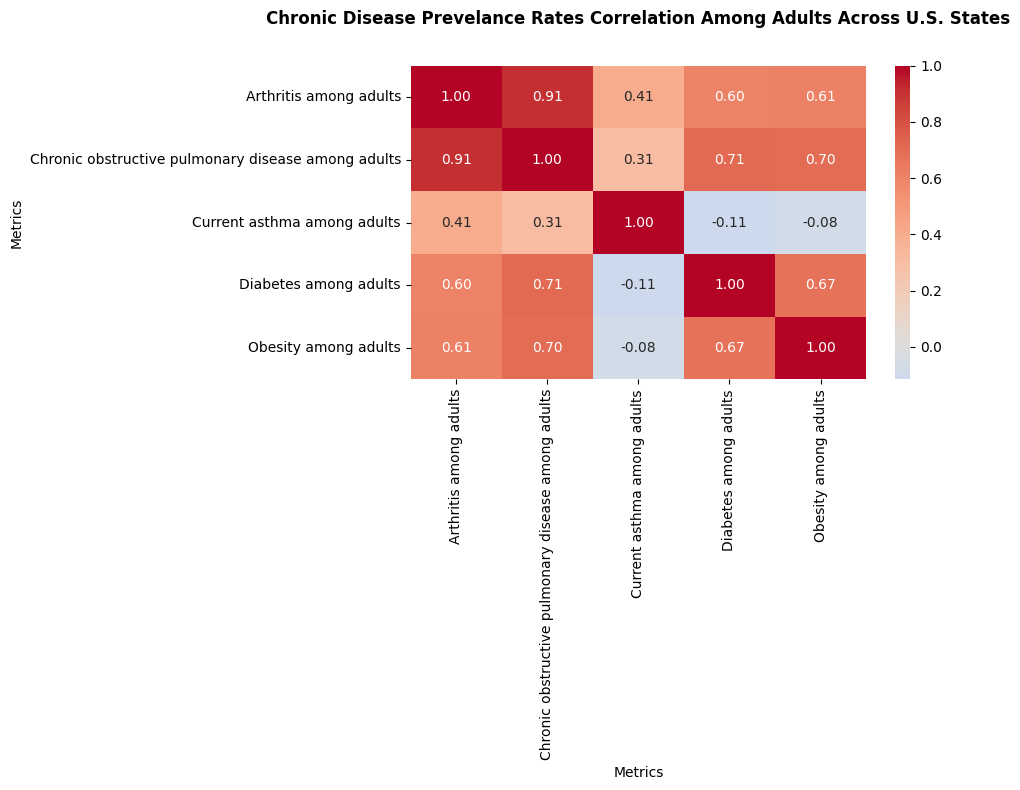

In [47]:
# Create a heatmap showing correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Pearson Correlation Headmap Chronic Disease Prevelance Rates Correlation Among Adults Across U.S. States",
         pad = 30,
         fontweight="bold"
)

plt.tight_layout()
plt.show()

###**Observations**
* There is a **strong positive correlation** between **arthritis and chronic obstructive pulmonary disease (COPD)** among adults, suggesting that states with higher arthritis prevalence also tend to have higher COPD prevalence.

* **Arthritis** shows a** moderate positive correlation** with both **diabetes and obesity**, indicating potential shared population-level risk factors across states.

* **COPD** exhibits **moderate to strong positive correlations** with **diabetes and obesity**, pointing to substantial co-variation of these conditions at the state level.

* **Diabetes** and **obesity** are **moderately positively correlated**, consistent with well-established population health patterns.

* Current **asthma** shows **weak or slightly negative correlations** with **diabetes** and **obesity**, suggesting a different geographic patterns compared to the other chronic diseases.

##**Scatter Plot Matrix**
The scatterplot matrix visualizes pairwise relationships among chronic disease prevalence rates that exhibited moderate to strong correlations in the Pearson correlation heatmap.

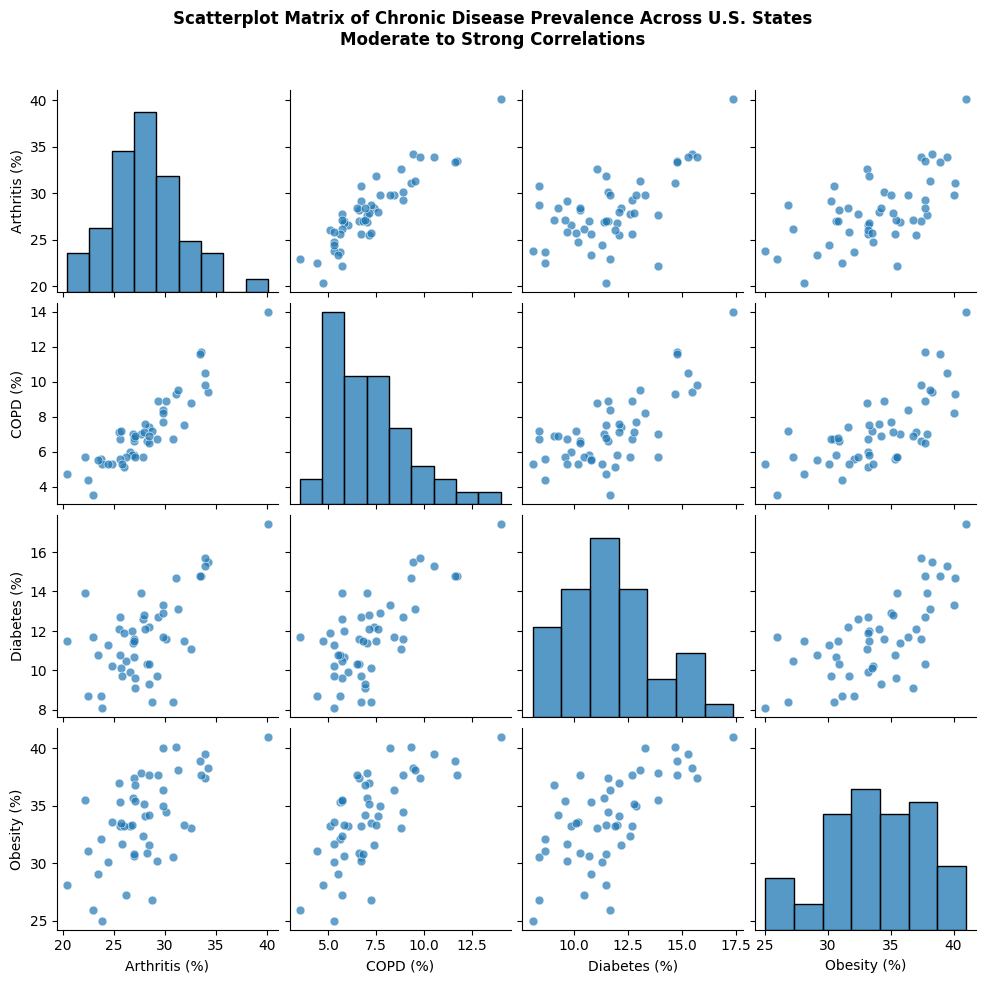

In [61]:

alias_map = {
    "Arthritis among adults": "Arthritis (%)",
    "Chronic obstructive pulmonary disease among adults": "COPD (%)",
    "Diabetes among adults": "Diabetes (%)",
    "Obesity among adults": "Obesity (%)",
    "Current asthma among adults": "Asthma (%)"
}

plot_df = pivot.rename(columns=alias_map)

# pair plot using the same dataframe as the correlation matrix
splom = sns.pairplot(
    data=plot_df,
    vars=disease_cols,
    diag_kind="hist",
    plot_kws={"alpha": 0.7, "s": 40},
    height=2.5
)

plt.suptitle(
    "Scatterplot Matrix of Chronic Disease Prevalence Across U.S. States\n"
    "Moderate to Strong Correlations",
    fontsize=12,
    fontweight="bold",
    y=0.98
)

plt.subplots_adjust(top=0.9)
plt.show()

##Observations
